<a href="https://colab.research.google.com/github/sunayna-ray/DisasterPreparednessAnalysis/blob/main/Disaster_Preparedness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
# !pip install graphframes
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!curl -L -o "/usr/local/lib/python3.7/dist-packages/pyspark/jars/graphframes-0.8.1-spark3.0-s_2.12.jar" https://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark3.0-s_2.12/graphframes-0.8.1-spark3.0-s_2.12.jar
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 44.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=f28bfcf790992a3fb350132c6fad0bc20e9809893517b4972ad0c341bb92ea86
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf

In [ ]:
# create a Spark session
conf = SparkConf().set("spark.ui.port", "4050").setExecutorEnv("memory", "4g").set("spark.driver.memory", "8g")

# create a Spark context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()


In [ ]:
from pyspark.sql.functions import *

incomeheader=["geoid", "household_income"]
income=spark.read.csv("income.csv", header=True).withColumn("id", substring("id", 10, 11) ).toDF(*incomeheader)
max_evac = spark.read.csv("max_evac.csv", header=True).withColumnRenamed("ct", "geoid")
flood = spark.read.csv("flood_percent.csv", header=True).withColumnRenamed("FIPS", "geoid")
gasheader=["geoid", "gas"]
gas = spark.read.csv("prep_gas.csv", header=True).toDF(*gasheader)
pharmaheader=["geoid", "pharma"]
pharma = spark.read.csv("prep_pharma.csv", header=True).toDF(*pharmaheader)
race = spark.read.csv("race.csv", header=True).withColumn("id", substring("id", 10, 11))
raceheader=[w.split("!!")[-1].replace(" ", "_").lower() if("!!" in w) else "geoid" for w in race.columns]
race=race.toDF(*raceheader)
popheader=["geoid", "population"]
pop = spark.read.csv("pop.csv", header=True).withColumn("id", substring("id", 10, 11)).toDF(*popheader)
attributes=income.join(max_evac, "geoid", "outer").join(flood, "geoid", "outer").\
                  join(gas, "geoid", "outer").\
                  join(pharma, "geoid", "outer").\
                  join(pop, "geoid", "outer").\
                  join(race, "geoid", "outer")
attributes.show(5)

In [ ]:
from pyspark.sql.functions import *
roads=spark.read.csv("road_density.csv", header=True).withColumnRenamed("GEOID", "geoid")
attributes=spark.read.csv("attributes.csv", header=True).join(roads, "geoid", "outer")
attributes.show(5)

+-----------+----------------+------------+-------------+-----------+-----------+----------+-----------+-------------------------------+---------------------------------------+-----------+------------------------------------------------+---------------------+-----------------+-----------------------------------+------------------------------------------------------------+------------+
|      geoid|household_income|evamax_value|flood_percent|        gas|     pharma|population|white_alone|black_or_african_american_alone|american_indian_and_alaska_native_alone|asian_alone|native_hawaiian_and_other_pacific_islander_alone|some_other_race_alone|two_or_more_races|two_races_including_some_other_race|two_races_excluding_some_other_race,_and_three_or_more_races|road_density|
+-----------+----------------+------------+-------------+-----------+-----------+----------+-----------+-------------------------------+---------------------------------------+-----------+------------------------------------

In [ ]:
attributes.coalesce(1).write.csv("attributes_1.csv", mode="overwrite", header=True)

In [ ]:
!pip install geopandas
import geopandas as gpd

shapefile = gpd.read_file("tl_2017_48_tract selection 1.shp")

In [ ]:
# !pip install momepy
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
graph = momepy.gdf_to_nx(shapefile, approach='primal')
graph

In [ ]:
# import networkx as nx
!pip install networkx
import networkx as nx
import pickle as serializer

In [ ]:
G=nx.read_shp('tl_2017_48_tract selection 1.shp')
A = nx.adjacency_matrix(G)
nx.draw(G)

In [ ]:
adjacency_mat = spark.read.csv("adjacency.csv", header=True, sep=" ")

In [ ]:
adjacency_mat.show(2)

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+---

In [ ]:
adjacency_mat.coalesce(1).write.csv("adjacency_mat.csv", mode="overwrite", header=True)

In [ ]:
!pip install requirements.txt

ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt


In [ ]:
!pip install scipy>=0.19.0

In [ ]:
!pip install numpy>=1.12.1

In [ ]:
!python3 Runme.py

Accelerated Attributed Network Embedding (AANE), 5-fold with 100% of training is used:
time elapsed: 1.29s
AANE for a pure network:
time elapsed: 1.02s


In [ ]:

import scipy.io as sio


'''################# Load data  #################'''
mat_contents = sio.loadmat('BlogCatalog.mat')
arr=mat_contents['Label']
# for a in arr: print(a)
arr

array([[6],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]], dtype=uint8)

In [ ]:
mat_contents['Network'].getrow(0).toarray()

array([[0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
type(mat_contents['Network'])

scipy.sparse.csc.csc_matrix

In [ ]:
mat_contents['Network']

<5196x5196 sparse matrix of type '<class 'numpy.float64'>'
	with 343486 stored elements in Compressed Sparse Column format>

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
mat_contents['Attributes']

<7575x12047 sparse matrix of type '<class 'numpy.float64'>'
	with 182517 stored elements in Compressed Sparse Column format>

In [ ]:
type(mat_contents['Attributes'])

scipy.sparse.csc.csc_matrix

In [ ]:
mat_contents

{'Attributes': <7575x12047 sparse matrix of type '<class 'numpy.float64'>'
 	with 182517 stored elements in Compressed Sparse Column format>,
 'Label': array([[8],
        [2],
        [7],
        ...,
        [3],
        [6],
        [4]], dtype=uint8),
 'Network': <7575x7575 sparse matrix of type '<class 'numpy.float64'>'
 	with 479476 stored elements in Compressed Sparse Column format>,
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Oct 17 16:58:12 2017',
 '__version__': '1.0'}

In [ ]:
type(mat_contents)

dict

In [ ]:
#mat_contents is a dict with the following
#Attributes has attribute matrix as sparse matrix of type numpy.float54 as compressed sparse column: scipy.sparse.csc.csc_matrix
#Network has adjacency matrix as same type
#Label: uint8 array: numpy.ndarray. labels of each node
#Embedding dimension need to be selected. They selected 100 for 12047 attributes
#d and lambda

In [ ]:

G = mat_contents["Network"]
A = mat_contents["Attributes"]
Label = mat_contents["Label"]

In [ ]:
n = G.shape[0]                              #Number of nodes
Indices = np.random.randint(25, size=n)+1   #n random integers in range 1 to 25 (due to +1)
a=np.random.randint(1, size=2)
np.random.randint(4, size=5)

array([1, 0, 2, 1, 2])

In [ ]:
a
a+1

array([1, 1])

In [ ]:
Indices

array([24,  5, 24, ..., 20, 11, 18])

In [ ]:
Group1 = []
Group2 = []
[Group1.append(x) for x in range(0, n) if Indices[x] <= 2]  # 2 for 10%, 5 for 25%, 20 for 100% of training group
[Group2.append(x) for x in range(0, n) if Indices[x] >= 21]  # test group
n1 = len(Group1)  # num of nodes in training group
n2 = len(Group2)  # num of nodes in test group
CombG = G[Group1+Group2, :][:, Group1+Group2]               #Selects submatrix of rows in Group1 and Group2 and columns in that, basically a subgraph of those vertices.
                                                            #If an index appears twice, it selects that row or column twice
CombA = A[Group1+Group2, :]                                 #Selects n1+n2 rows from attribute matrix with all columns

NameError: ignored

In [ ]:
A[2, :]

<1x12047 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Column format>

In [ ]:
import numpy as np
test=np.random.randint(5, size=(2, 4))
test

array([[2, 4, 4, 0],
       [3, 4, 4, 4]])

In [ ]:
test[[0,0],:][:,[1,2]]

array([[4, 4],
       [4, 4]])

In [ ]:
import pandas as pd
a=pd.DataFrame.sparse.from_spmatrix(A)[1]

In [ ]:
type(a)

pandas.core.series.Series

In [ ]:
for b in a: print(b)

In [ ]:
a.describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7570    0.0
7571    0.0
7572    0.0
7573    0.0
7574    0.0
Name: 1, Length: 7575, dtype: Sparse[float64, 0]>

In [ ]:
## less lambda, graph less: range is 10^-6 to 10^3
## They have found lamda optimal at 0.1: 0.001, 0.01, 0.05, 0.1

## If dimension has high, computation and time spent is high
## sparse matrix 7575 size->20-180 (default is 100)
## For us no of nodes is less, dimension can be less maybe

In [ ]:
import numpy as np
adjacency = np.genfromtxt("adjacency_correct.csv", dtype=None, delimiter=',', skip_header=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [ ]:
import pandas as pd
adjacency_pd=pd.read_csv("adjacency.csv", index_col=False)
df=adjacency_pd.sort_values(by=['Unnamed: 0'], axis=0).set_index('Unnamed: 0').sort_index()
df

,48201542301,48201552601,48201323701,48201240702,48201240501,48201240701,48201240901,48201241103,48201450802,48201450801,...,48201250401,48201451401,48201451402,48201212500,48201324200,48201533701,48201223002,48201980100,48201250402,48201232301
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
48201100000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48201555701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201555702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201556000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# adjacency_pd.sort_values(by=['48201542301'])
# adjacency_pd=adjacency_pd.iloc[1: , 1:]
# df=adjacency_pd.sort_values(by=['Unnamed: 0'], axis=0)
adjacency_pd=df.reindex(sorted(df.columns), axis=1).iloc[1: , 1:]

In [ ]:
adjacency_pd

,48201210100,48201210400,48201210500,48201210600,48201210700,48201210800,48201210900,48201211000,48201211100,48201211200,...,48201555401,48201555402,48201555501,48201555502,48201555600,48201555701,48201555702,48201556000,48201980000,48201980100
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
48201210100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210400,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210500,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210600,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48201210700,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48201555701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
48201555702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
48201556000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [ ]:
from scipy.sparse import csc_matrix
adjacency_csc=csc_matrix(adjacency_pd, dtype=np.float64)

In [ ]:
from scipy import sparse
sparse.save_npz("adjacency.npz", adjacency_csc)

In [ ]:
attributes_pd=pd.read_csv("attributes_removenull.csv")
attributes_pd.sort_values(by=['geoid'])
attributes_pd=attributes_pd.iloc[1: , 1:]

In [ ]:
attributes_pd

,household_income,evamax_value,flood_percent,gas,pharma,population,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,two_races_including_some_other_race,"two_races_excluding_some_other_race,_and_three_or_more_races",road_density
1,76,0.904762,0.181567,-0.500000,0.000000,6252,2832,3029,0,9,18,299,65,25,40,18.799125
2,1609,0.276923,0.195740,1.964286,0.446154,4556,3297,900,0,0,35,239,85,66,19,17.014457
3,1849,2.021978,0.081441,0.167336,2.768576,5649,4408,841,30,0,71,195,104,37,67,17.232861
4,2038,-0.092857,0.001791,0.770833,3.231569,5289,4939,59,31,0,0,215,45,0,45,17.883235
5,748,0.431818,0.000000,0.271635,13.053945,2829,2161,220,35,1,0,226,186,134,52,19.031979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2630,0.637291,0.217577,1.170772,1.452779,8886,7548,690,32,416,0,0,200,0,200,5.982097
782,3906,0.075653,0.065514,0.492147,1.085256,12869,10140,1241,69,904,0,274,241,102,139,8.652806
783,2438,0.204090,0.000000,4.335004,4.921219,7968,5827,1048,22,338,29,663,41,0,41,1.752602
784,9,0.821429,0.000000,0.000000,0.000000,9,9,0,0,0,0,0,0,0,0,1.428513


In [ ]:
attributes_csc=csc_matrix(attributes_pd, dtype=np.float64)

In [ ]:
sparse.save_npz("attributes.npz", attributes_csc)
attributes_csc

<785x16 sparse matrix of type '<class 'numpy.float64'>'
	with 10454 stored elements in Compressed Sparse Column format>

In [ ]:
attributes_pyspark=spark.read.option('header', True).csv("attributes_original.csv")

In [ ]:
import pyspark.sql.functions as F
attributes_pyspark.agg(F.mean('gas'), F.mean('pharma')).show(100)

+------------------+-----------------+
|          avg(gas)|      avg(pharma)|
+------------------+-----------------+
|1.7961747682152054|4.162211698334184|
+------------------+-----------------+



In [ ]:
attributes_pyspark=attributes_pyspark.withColumn('gas', F.when(F.col('gas').isNull(), 1.7961747682152054).otherwise(F.col('gas')))\
                  .withColumn('pharma', F.when(F.col('pharma').isNull(), 4.162211698334184).otherwise(F.col('gas')))

In [ ]:
# attributes_pd=pd.read_csv("attributes.csv")
attributes_pd=attributes_pyspark.toPandas()
attributes_pd.sort_values(by=['geoid'])

,geoid,household_income,evamax_value,flood_percent,gas,pharma,population,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,two_races_including_some_other_race,"two_races_excluding_some_other_race,_and_three_or_more_races",road_density
0,48201100000,2239,0.516067839,0.094151979,0.776788124,0.776788124,4712,3339,780,29,231,0,199,134,43,91,19.94477244
1,48201210100,76,0.904761905,0.181567183,-0.5,-0.5,6252,2832,3029,0,9,18,299,65,25,40,18.79912481
2,48201210400,1609,0.276923077,0.195740497,1.964285714,1.964285714,4556,3297,900,0,0,35,239,85,66,19,17.01445748
3,48201210500,1849,2.021978022,0.08144081,0.167335784,0.167335784,5649,4408,841,30,0,71,195,104,37,67,17.23286145
4,48201210600,2038,-0.092857143,0.00179091,0.770833333,0.770833333,5289,4939,59,31,0,0,215,45,0,45,17.88323497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,48201555701,2630,0.637291155,0.217577117,1.170771757,1.170771757,8886,7548,690,32,416,0,0,200,0,200,5.982096992
782,48201555702,3906,0.075652612,0.065513516,0.492146597,0.492146597,12869,10140,1241,69,904,0,274,241,102,139,8.652805997
783,48201556000,2438,0.204089816,0,4.335004177,4.335004177,7968,5827,1048,22,338,29,663,41,0,41,1.752601727
784,48201980000,9,0.821428571,0,1.7961747682152054,4.162211698334184,9,9,0,0,0,0,0,0,0,0,1.428513087


In [ ]:
attributes_pd.sort_values(by=['geoid'])
attributes_pd=attributes_pd.iloc[1: , 1:]
attributes_csc=csc_matrix(attributes_pd, dtype=np.float64)
sparse.save_npz("attributes.npz", attributes_csc)
attributes_csc

<785x16 sparse matrix of type '<class 'numpy.float64'>'
	with 12560 stored elements in Compressed Sparse Column format>

In [ ]:
attributes_pd

,household_income,evamax_value,flood_percent,gas,pharma,population,white_alone,black_or_african_american_alone,american_indian_and_alaska_native_alone,asian_alone,native_hawaiian_and_other_pacific_islander_alone,some_other_race_alone,two_or_more_races,two_races_including_some_other_race,"two_races_excluding_some_other_race,_and_three_or_more_races",road_density
1,76,0.904761905,0.181567183,-0.5,-0.5,6252,2832,3029,0,9,18,299,65,25,40,18.79912481
2,1609,0.276923077,0.195740497,1.964285714,1.964285714,4556,3297,900,0,0,35,239,85,66,19,17.01445748
3,1849,2.021978022,0.08144081,0.167335784,0.167335784,5649,4408,841,30,0,71,195,104,37,67,17.23286145
4,2038,-0.092857143,0.00179091,0.770833333,0.770833333,5289,4939,59,31,0,0,215,45,0,45,17.88323497
5,748,0.431818182,0,0.271634615,0.271634615,2829,2161,220,35,1,0,226,186,134,52,19.03197875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,2630,0.637291155,0.217577117,1.170771757,1.170771757,8886,7548,690,32,416,0,0,200,0,200,5.982096992
782,3906,0.075652612,0.065513516,0.492146597,0.492146597,12869,10140,1241,69,904,0,274,241,102,139,8.652805997
783,2438,0.204089816,0,4.335004177,4.335004177,7968,5827,1048,22,338,29,663,41,0,41,1.752601727
784,9,0.821428571,0,1.7961747682152054,4.162211698334184,9,9,0,0,0,0,0,0,0,0,1.428513087


In [ ]:
attributes_pyspark.show(10)

+-----------+----------------+------------+-------------+-----------+-----------+----------+-----------+-------------------------------+---------------------------------------+-----------+------------------------------------------------+---------------------+-----------------+-----------------------------------+------------------------------------------------------------+------------+
|      geoid|household_income|evamax_value|flood_percent|        gas|     pharma|population|white_alone|black_or_african_american_alone|american_indian_and_alaska_native_alone|asian_alone|native_hawaiian_and_other_pacific_islander_alone|some_other_race_alone|two_or_more_races|two_races_including_some_other_race|two_races_excluding_some_other_race,_and_three_or_more_races|road_density|
+-----------+----------------+------------+-------------+-----------+-----------+----------+-----------+-------------------------------+---------------------------------------+-----------+------------------------------------

In [ ]:
attributes_pyspark.write.option('header', True).csv('attributes_mean')

In [ ]:
import numpy as np
import scipy.io as sio
mat_contents = sio.loadmat('BlogCatalog.mat')

In [ ]:
mat_contents

{'Attributes': <5196x8189 sparse matrix of type '<class 'numpy.float64'>'
 	with 369435 stored elements in Compressed Sparse Column format>,
 'Label': array([[6],
        [2],
        [2],
        ...,
        [4],
        [4],
        [4]], dtype=uint8),
 'Network': <5196x5196 sparse matrix of type '<class 'numpy.float64'>'
 	with 343486 stored elements in Compressed Sparse Column format>,
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Oct 17 16:57:18 2017',
 '__version__': '1.0'}

In [ ]:
from scipy import sparse

In [ ]:
attributes= sparse.load_npz("attributes.npz")

In [ ]:
adjacency= sparse.load_npz("adjacency.npz")

In [ ]:
mdict={'Attributes': attributes, 'Network':adjacency}

In [ ]:
import scipy
scipy.io.savemat('harriscounty.mat',mdict)

In [ ]:
embedding=scipy.io.loadmat('Embedding.mat')

In [ ]:
embedding=embedding['H_AANE']

In [ ]:
embedding

array([[-0.06597398, -0.14171496, -0.56783987, ..., -0.05522901,
        -1.61056505, -1.84612849],
       [-0.07085977, -0.15016185, -0.59574031, ..., -0.0155176 ,
        -1.48931725, -1.81644848],
       [-0.05062276, -0.1231549 , -0.56806675, ..., -0.06690416,
        -1.26373516, -1.53220235],
       ...,
       [-0.0657336 , -0.12272317, -0.55080474, ..., -0.07728446,
        -1.15260046, -1.4514609 ],
       [-0.063445  , -0.11665506, -0.55328561, ..., -0.07777788,
        -1.17599512, -1.43890042],
       [-0.05693325, -0.13450854, -0.52948077, ..., -0.04920453,
        -1.22704587, -1.56970025]])

In [ ]:
!pip install stellargraph
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import pandas as pd
attributes_pd=pd.read_csv("attribute_v1.csv")
attributes_pd.sort_values(by=['FIPS'])
# attributes_pd=attributes_pd.iloc[1: , 1:]

,FIPS,household_income,evamax_value,flood_percent,gas,pharma,population,road_density,distance,time,trips,days
0,48201100000,2239,0.516068,0.094152,0.776788,0.771339,4712,19.944772,-0.134490,-0.040711,0.025659,1
1,48201210100,76,0.904762,0.181567,-0.500000,0.000000,6252,18.799125,-0.032171,-0.016728,0.001069,2
2,48201210400,1609,0.276923,0.195740,1.964286,0.446154,4556,17.014457,-0.208602,-0.127040,0.214260,1
3,48201210500,1849,2.021978,0.081441,0.167336,2.768576,5649,17.232861,-0.128828,-0.051055,0.074379,2
4,48201210600,2038,-0.092857,0.001791,0.770833,3.231569,5289,17.883235,-0.112906,0.019264,-0.005535,1
...,...,...,...,...,...,...,...,...,...,...,...,...
781,48201555701,2630,0.637291,0.217577,1.170772,1.452779,8886,5.982097,0.007019,0.099996,-0.048660,1
782,48201555702,3906,0.075653,0.065514,0.492147,1.085256,12869,8.652806,-0.066306,0.117873,-0.070409,1
783,48201556000,2438,0.204090,0.000000,4.335004,4.921219,7968,1.752602,-0.189668,-0.064350,0.069244,1
784,48201980000,9,0.821429,0.000000,NaN,NaN,9,1.428513,-0.073535,-0.004337,0.039608,1


In [ ]:
label=attributes_pd['days'].iloc[1:]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


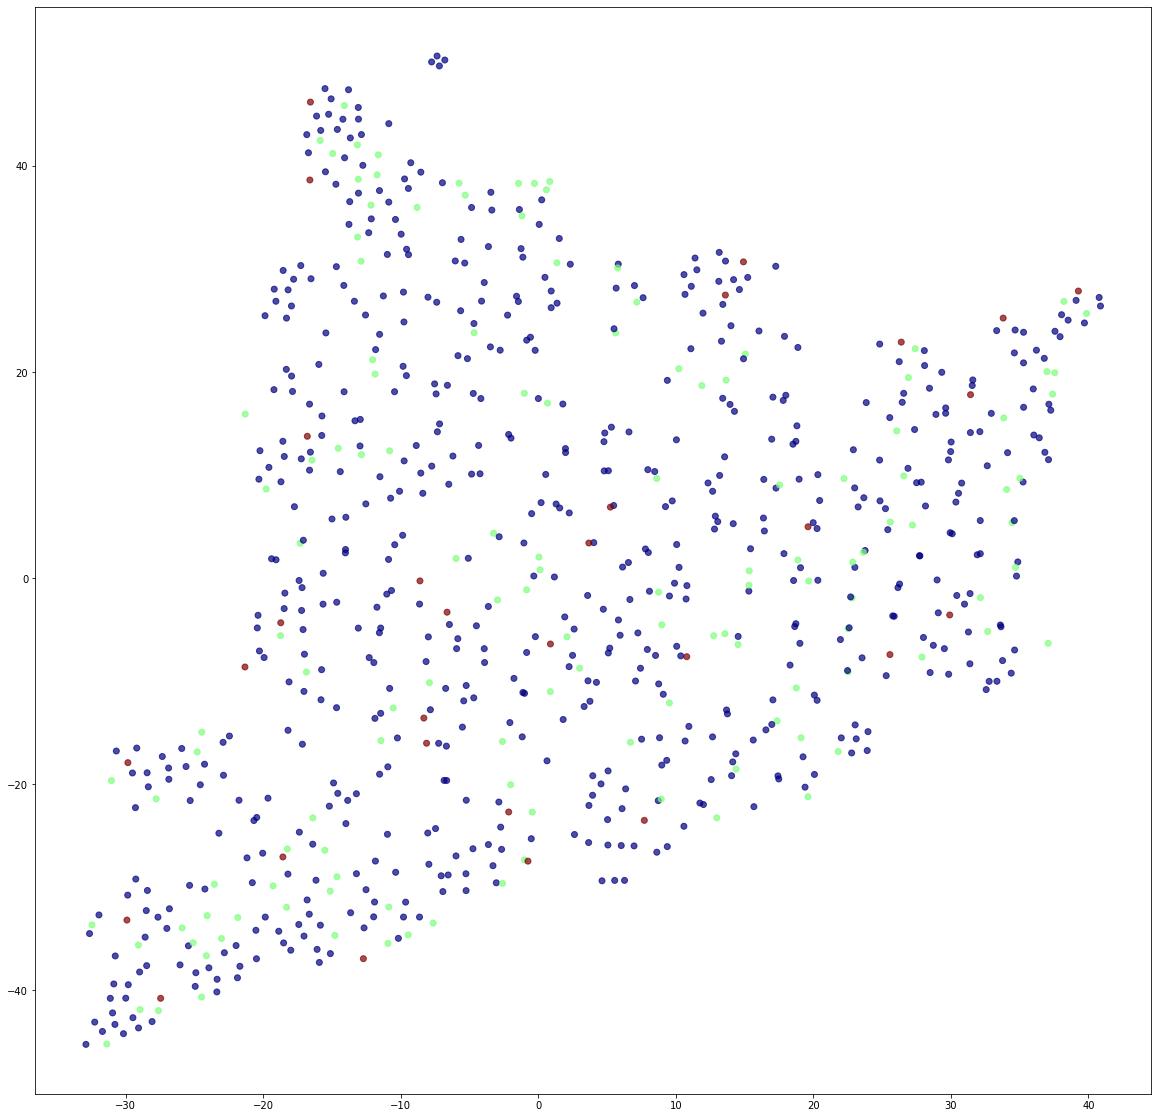

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
weighted_node_embeddings_2d = tsne.fit_transform(embedding)
node_targets = label.astype("category")
alpha = 0.7

plt.figure(figsize=(20, 20))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    c=node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

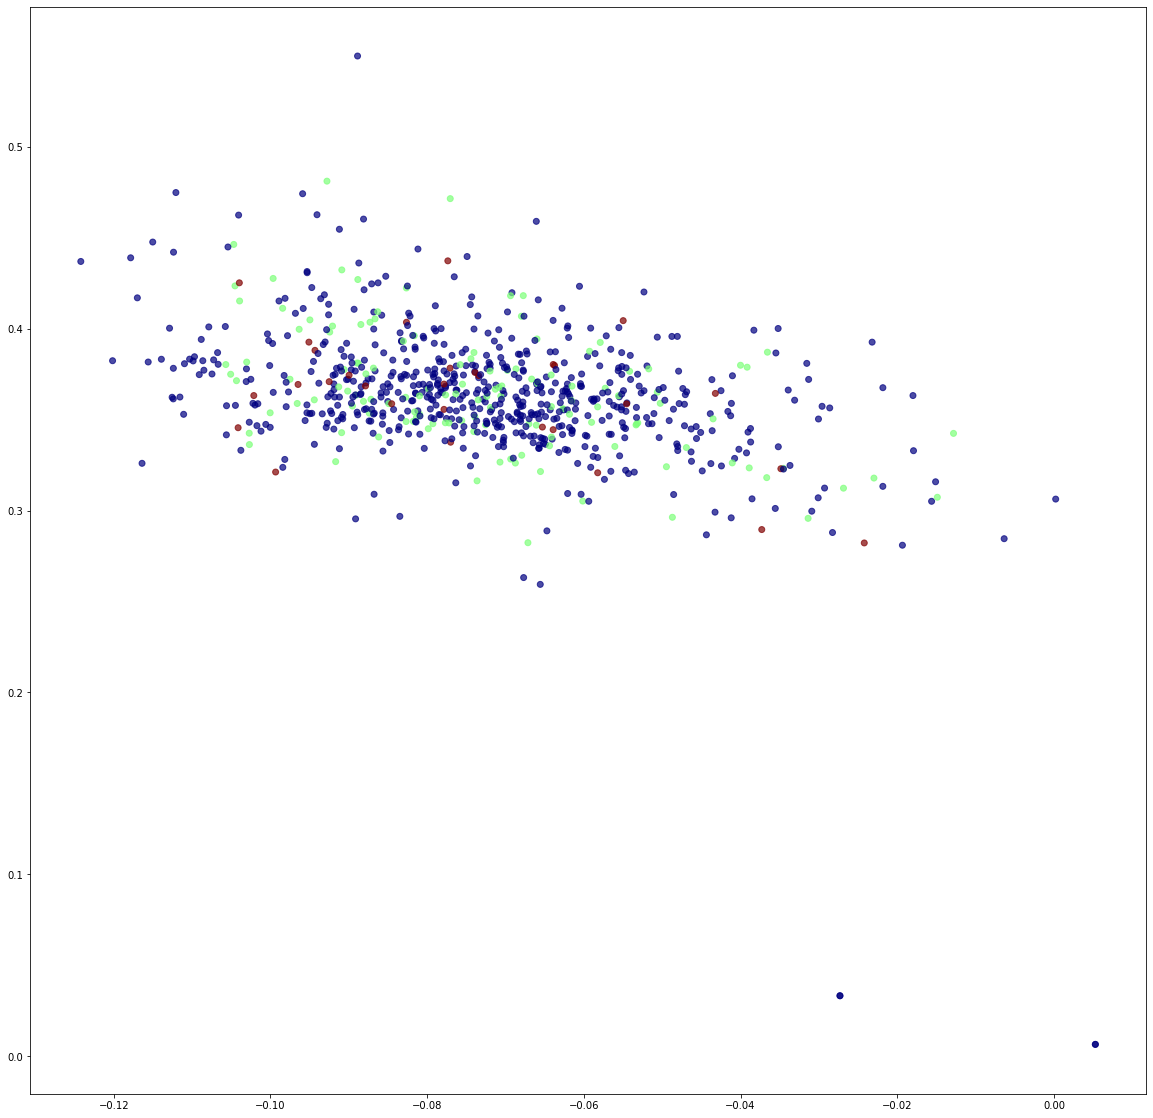

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(
    embedding[:, 0],
    embedding[:, 10],
    c=node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()